The dataset consists of transaction details of 8950 credit card customers. We will be conducting some Exploratory analysis and doing Clustering of these customers on the basis of features which are essentially thir transaction details.

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Reading in the data from the csv file on the system

In [2]:
cc = pd.read_csv('D:\ccdata\CC_GENERAL.csv')

Looking at the first 10 rows of the dataset

In [43]:
cc.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Finding missing values in the dataset using isnull function 

In [4]:
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Since, only a handful of values seem to be missing we will be using the median value of the colun to impute those missing values.

In [5]:
cc['MINIMUM_PAYMENTS'].replace(np.NaN, cc['MINIMUM_PAYMENTS'].median(), inplace = True)
cc['CREDIT_LIMIT'].replace(np.NaN,cc['CREDIT_LIMIT'].median(), inplace = True)

In [6]:
cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Exploratory Data Analysis(EDA)

Normalizing the data before carrying out basic statistical analysis since, values in some of the columns are multiple times that of values in other columns. Putting them on the same level and then applying statistical functions on them would help us build better insights regarding the patterns like correlation among features.

In [7]:
#Creating a copy of the dataset
cc_copy = cc.copy()

In [8]:
# Columns to normalize
cols = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
        'PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']

# We will be using logarithm function to scale down the values of columns that have consirably high values
cc_copy[cols] = np.log(1 + cc_copy[cols])

In [9]:
cc_copy[cols].head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,3.735304,4.568506,0.000000,4.568506,0.000000,1.098612,6.908755,5.312231,4.945277
1,8.071989,0.000000,0.000000,0.000000,8.770896,0.000000,8.853808,8.319725,6.978531
2,7.822504,6.651791,6.651791,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994
3,7.419183,7.313220,7.313220,0.000000,5.331694,0.693147,8.922792,0.000000,5.747301
4,6.707735,2.833213,2.833213,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483


Visualizing the correlation among all the variables/features in the set by means of a Heatmap

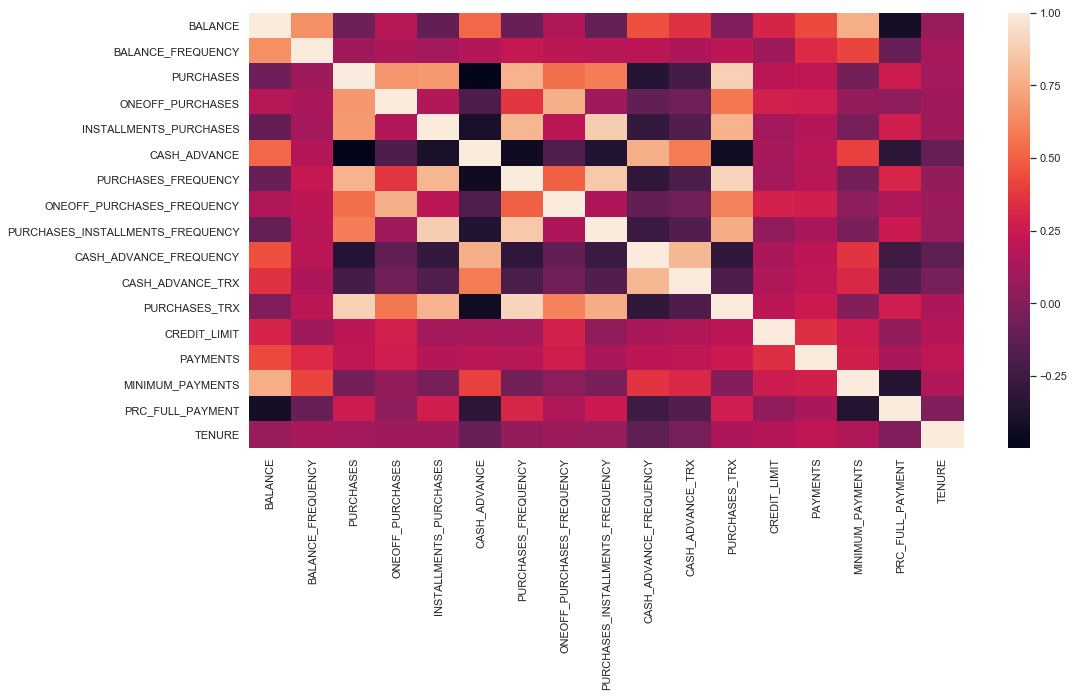

In [10]:
f, ax = plt.subplots(figsize = (16,8))
sns.heatmap(cc_copy.corr())

In [11]:
# Finding some basic statistical metrics of the normalized set using describe method in pandas
cc_copy.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.877271,4.899647,3.204274,3.352403,3.319086,0.490351,0.202458,0.364437,0.135144,3.248827,1.894731,8.094825,6.624540,5.916079,0.153715,11.517318
std,2.013303,0.236904,2.916872,3.246365,3.082973,3.566298,0.401371,0.298336,0.397448,0.200121,6.824647,1.373856,0.819629,1.591763,1.169929,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,6.000000
25%,4.861995,0.888889,3.704627,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,12.000000
50%,6.773521,1.000000,5.892417,3.663562,4.499810,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,12.000000
75%,7.628099,1.000000,7.013133,6.360274,6.151961,7.016449,0.916667,0.300000,0.750000,0.222222,4.000000,2.890372,8.779711,7.550732,6.671670,0.142857,12.000000
max,9.854515,1.000000,10.800403,10.615512,10.021315,10.760839,1.000000,1.000000,1.000000,1.500000,123.000000,5.883322,10.308986,10.834125,11.243832,1.000000,12.000000


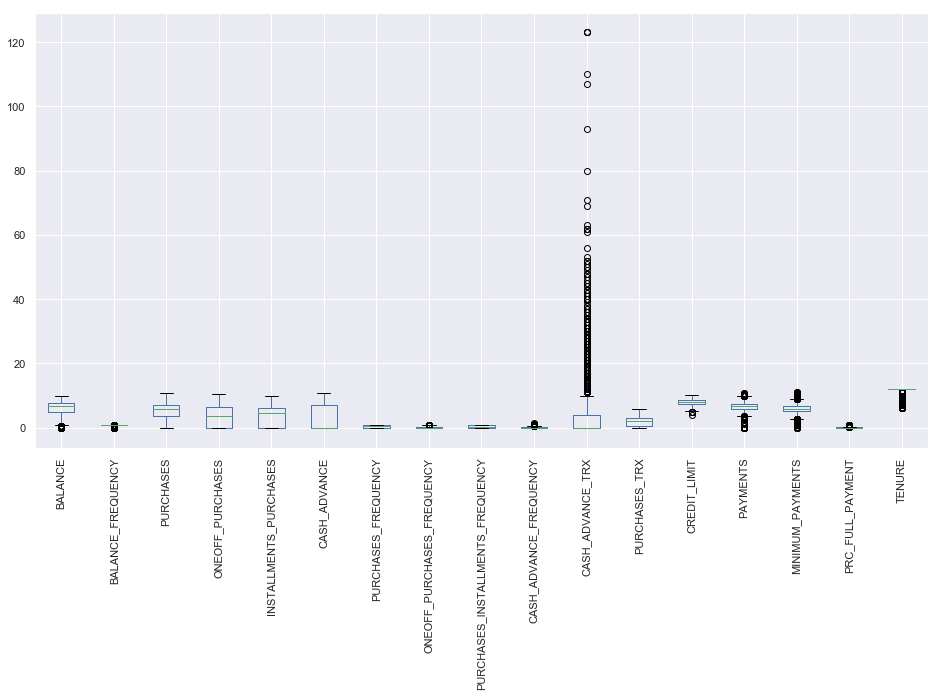

In [12]:
#Visualizing these statistical metrics by means of a boxplot
cc_copy.boxplot(rot=90, figsize=(16,8))

Pulling out features from the data set i.e. using all the features in the st except the Customer_ID column.

In [13]:
features = cc_copy.iloc[:,1:]

We will be scaling th entire data set before applying the Clustering algorithm using Standard Scaler to better normalize our data. 
Standard Scaler would normalize the features such that each variable/ feature will have mean = 0 and standard deviation = 1.

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(features)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
features.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0,1.098612,6.908755,5.312231,4.945277,0.000000,12
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,4,0.000000,8.853808,8.319725,6.978531,0.222222,12
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,2.564949,8.922792,6.434654,6.442994,0.000000,12
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,1,0.693147,8.922792,0.000000,5.747301,0.000000,12
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,0.693147,7.090910,6.521114,5.504483,0.000000,12


# Clustering

We will be using the kmeans clustering algorithm to find clusters of customers from their spending behaviour.

In [16]:
from sklearn.cluster import KMeans

Initializing the kmeans clustering algorithm and fitting it on our data to find the adequate number of clusters for our data segmentation.

We will be analyzing the behaviour of the algorithm for no. of clusters ranging from 1 to 11

In [17]:
inertia = []
for n in range(1,11):
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 100)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)    

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

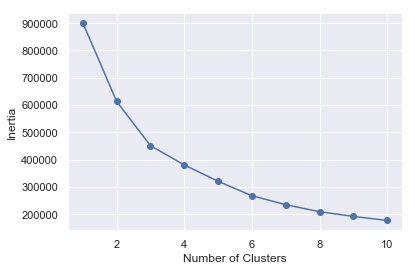

In [44]:
plt.plot(range(1,11), inertia, 'o-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title('No. of clusters vs inertia')

Applying the clustering algorithm on our data

In [32]:
# Initializing the parameters of Kmeans such as no. of clusters,
#initiation algorithm kmeans++ for chhosing initial values,
#random state set to a fixed number for repeatability of the result
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 10)

#Fitting the algorithm on the data set and predictions
#for each sample regarding to which cluster each of those sampes belong 
clusters = kmeans.fit_predict(features)

In [33]:
clusters

array([0, 5, 4, ..., 0, 5, 4])

Plotting the results in form of a histogram so as to visualize the number of customers per cluster

Text(0.5, 1.0, 'Customers per Cluster')

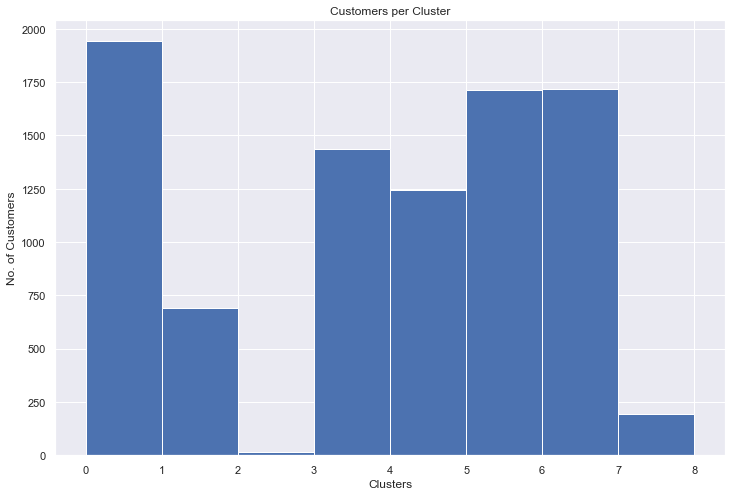

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(clusters, bins = range(9))
plt.xlabel('Clusters')
plt.ylabel('No. of Customers')
plt.title('Customers per Cluster')